In [ ]:
# Shivansh Chaturvedi
# GR5074 - Advanced Projects in Machine Learning 
# Homework 1

# GitHub Repo: https://github.com/shivansh-chaturvedi/GR5074-Advanced-Machine-Learning

# Assignment #1: Write up a report on U.N. World Happiness Data

#### Imports and setting up data

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [ ]:
!pip install aimodelshare --upgrade

In [ ]:
# import data from computer
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [ ]:
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


#### Pre-processing Data


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# preprocessing pipelines for both numeric and categorical data.

# preprocessing pipeline for numeric data
numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# preprocessing pipeline for categorical data
categorical_features = ['region', 'sub-region']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer...
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [ ]:
# Here is where we actually write the preprocessor function:

# Write function to transform data with preprocessor 
# In this case we use sklearn's Column transformer in our preprocessor function

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [ ]:
# Save preprocessor function to local "preprocessor.zip" file

import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


#### Explore bivariate results (Use visualizations!)

In [ ]:
df = pd.concat((X_train, y_train_labels), axis=1)
df.rename(columns = {0: 'Happiness'}, inplace = True)

order = ['Very Low', 'Low', 'Average', 'High', 'Very High']
df['Happiness'] = pd.Categorical(df['Happiness'], categories=order)
df_sorted = df.sort_values(by='Happiness')

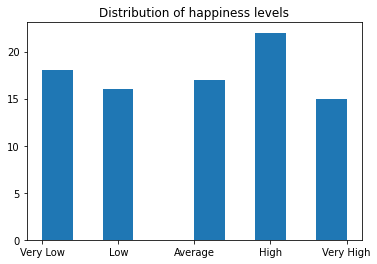

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


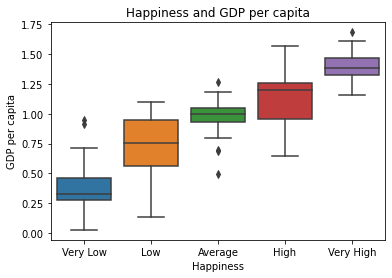

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


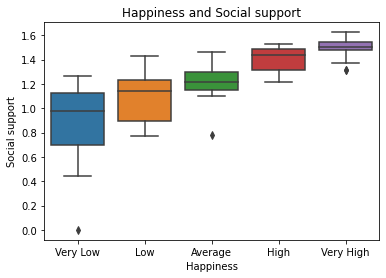

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


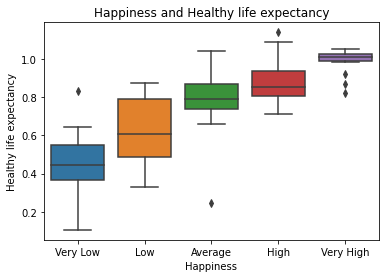

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


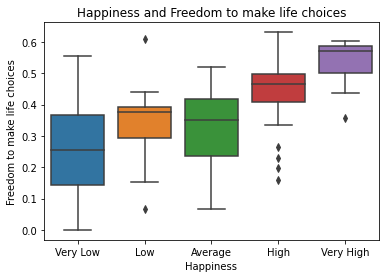

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


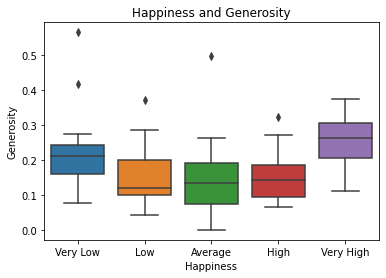

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


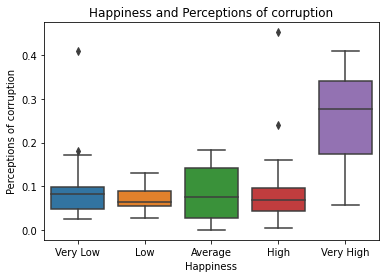

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


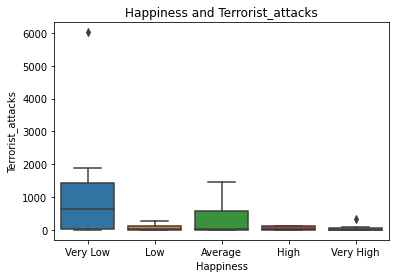

In [ ]:
plt.hist(df_sorted['Happiness'])
plt.title('Distribution of happiness levels')
plt.show()

columns = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Terrorist_attacks']
for column in columns:
  sns.boxplot('Happiness', column, data=df_sorted)
  plt.title("Happiness and "+str(column))
  plt.show()

The graphs above show that in a dataset with fairly well distrbuted levels of happiness, there are obvious trends.
- GDP per capita definitely plays a large role in increasing happiness
- Social support levels also help boost happiness
- Life expectancy increases happiness -- or is it vice-versa?
- Freedom also increases happiness
- Generosity, perhaps, doesn't have a clear relationship, and neither does corruption
- The presence of terrorist attacks is a big factor in causing unhappiness

#### Examine features that predict happiness categories using one or more models that allow for automatic feature selection

In [ ]:
# automatic feature selection through Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(numeric_transformer.fit_transform(X_train.drop(['region', 'sub-region', 'Country or region', 'name'], axis=1)), y_train_labels)

names = (pd.Series((X_train.drop(['region', 'sub-region', 'Country or region', 'name'], axis=1).columns), name='Category'))
coefs = (pd.DataFrame(logreg.coef_).T)
logregtable = pd.concat((names, coefs), axis=1)
logregtable = logregtable.rename({0:'Very Low', 1:'Low', 2:'Average', 3:'High', 4: 'Very High'}, axis=1)
display(logregtable)

print("We can see in the above table of coefficients that the higher the coefficients for GDP, Social Support, and life expectancy are still important factors, even when allowing for feature selection.")

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(numeric_transformer.fit_transform(X_train.drop(['region', 'sub-region', 'Country or region', 'name'], axis=1)), y_train)

coefs = pd.DataFrame(tree.feature_importances_)
names = (pd.Series((X_train.drop(['region', 'sub-region', 'Country or region', 'name'], axis=1).columns), name='Category'))
treetable = pd.concat((names, coefs), axis=1)
display(treetable)

print("We can see in the above table of coefficients that the higher the coefficients for GDP, Social Support, and life expectancy are still important factors, even when allowing for feature selection.")


,Category,Very Low,Low,Average,High,Very High
0,GDP per capita,0.000000,0.000000,-0.012849,1.673848,-1.437479
1,Social support,0.000000,1.370059,0.000000,0.530371,-0.450069
2,Healthy life expectancy,0.370045,0.647004,-0.823116,0.047196,-0.077368
3,Freedom to make life choices,-0.267249,0.665337,0.000000,0.140460,-0.196285
4,Generosity,-0.168703,-0.580995,-0.147450,0.576673,0.292802
5,Perceptions of corruption,-0.372305,-0.949290,-0.452785,0.622895,0.278842
6,Terrorist_attacks,0.000000,0.000000,-1.293079,0.000000,1.078602


We can see in the above table of coefficients that the higher the coefficients for GDP, Social Support, and life expectancy are still important factors, even when allowing for feature selection.


,Category,0
0,GDP per capita,0.285514
1,Social support,0.227684
2,Healthy life expectancy,0.231819
3,Freedom to make life choices,0.105244
4,Generosity,0.047458
5,Perceptions of corruption,0.056294
6,Terrorist_attacks,0.045987


We can see in the above table of coefficients that the higher the coefficients for GDP, Social Support, and life expectancy are still important factors, even when allowing for feature selection.


#### Experiment with different prediction models to try to predict World Happiness well (Fit and compare, at minimum, three models)

In [ ]:
# first, RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(1, 10, 2),'max_depth':[1, 5, 9]} 

model1 = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)
model1.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(model1.best_score_))
print("best parameters: {}".format(model1.best_params_))

best mean cross-validation score: 0.646
best parameters: {'max_depth': 5, 'n_estimators': 9}


In [ ]:
# second, GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators': np.arange(1, 10, 2),'max_depth':[1, 5, 9]}

model2 = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=10)
model2.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(model2.best_score_))
print("best parameters: {}".format(model2.best_params_))

best mean cross-validation score: 0.582
best parameters: {'max_depth': 1, 'n_estimators': 9}


0.7159090909090909

In [ ]:
# third, KNearestNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': np.arange(1, 10, 2)} 

model3 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
model3.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(model3.best_score_))
print("best parameters: {}".format(model3.best_params_))

best mean cross-validation score: 0.626
best parameters: {'n_neighbors': 7}


After using three models as seen above, we find that the best score results from using RandomForestClassifier. 

```
Best mean cross-validation score: 0.646
best parameters: {'max_depth': 5, 'n_estimators': 9}
```



#### Submitting models

In [ ]:
# Model 1

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] 
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  

onnx_model = model_to_onnx(model1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this Titanic Survival Playground -- make sure to update the apiurl for new competition deployments
apiurl='https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m'

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 1: 

#-- Generate predicted values 
prediction_labels = model1.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                  custom_metadata = {'team':'3'})

Insert search tags to help users find your model (optional): RandomForestClassifier, shivansh
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 730

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
# Model 2

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] 
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  

onnx_model = model_to_onnx(model2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 2: 

#-- Generate predicted values 
prediction_labels = model1.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                  custom_metadata = {'team':'3'})

Insert search tags to help users find your model (optional): GradientBoostingClassifier, shivansh
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 732

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
# Model 3

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] 
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  

onnx_model = model_to_onnx(model3, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 3: 

#-- Generate predicted values 
prediction_labels = model1.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                  custom_metadata = {'team':'3'})

Insert search tags to help users find your model (optional): KNeighborsClassifier, shivansh
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 733

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


Overall, my RandomForestClassifier model worked best, however, I believe that there were improvements I could have made by fine-tuning the parameters: in discussions with my teammates, I found that they all took multiple attempts at each model to get the best value; I only used GridSearchCV with very few parameters to get my results. 

I think some of the hyperparameters that are most relevant are n_estimators and max_depth. In an ideal world, I would have liked to increase the arange of my n_estimators parameter to closer to 1000; however, with a deadline to submit, I was not able to get the model to run in time. 

In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)